<a href="https://colab.research.google.com/github/AzlinRusnan/STQD6014-Data-Science/blob/main/Data_Science_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Python Odyssey into Video Game Ratings and Reviews**

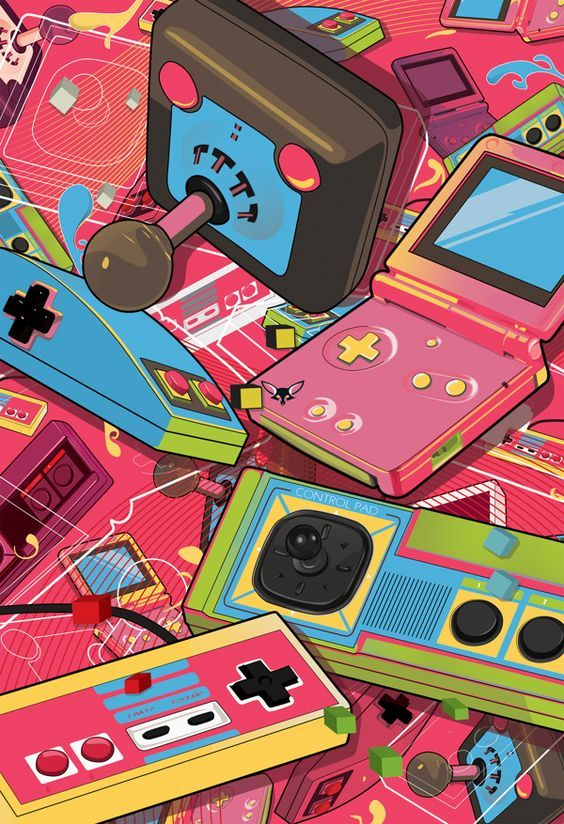

## **Introduction: Decoding the Digital Playground**

In an era where virtual worlds are just as intricate as our reality, video games have transcended beyond mere entertainment. They are digital odysseys, offering gateways to fantastical realms, heart-racing adventures, and narratives that often rival the depth of traditional literature. With millions immersing themselves in these pixelated realities, the gaming industry has evolved into a cultural and economic powerhouse.

Against this backdrop, video games are not just coded canvases; they are experiences—meticulously rated and reviewed by a community of passionate players and professional critics. These ratings are more than numbers; they encapsulate hours of gameplay, graphics ingenuity, narrative creativity, and the emotional responses they elicit.

This project embarks on a Python-powered journey through an extensive dataset of video game ratings. We dive into the world of meta scores and user reviews, platforms and play experiences, unveiling patterns and insights within a dataset rich with player sentiment and critical acclaim. Through the lens of Exploratory Data Analysis, we seek to understand the nuances that define gaming greatness and the platforms that best deliver it.

As we parse through the data, each visualization is a level up, revealing stories told through scores and opinions. From the retro charm of the Nintendo 64 to the cutting-edge allure of the PlayStation 5, we analyze how user reviews and professional ratings converge or clash. We observe trends, outliers, and anomalies that might hint at the ever-evolving tastes of gamers or the critical standards of the industry

Join us as we decode the digital playground, leveraging Python's analytical prowess to distill complex data into compelling insights. This is not just an analysis; it's an homage to the gaming culture and the shared experiences it creates.

### **Inspiration**
Inspired by 5 year-old son - continue


---



### **About the Dataset**
The source of the data is from https://www.kaggle.com/datasets/thedevastator/video-game-ratings-and-reviews-dataset

This comprehensive dataset is contained meticulously compiled collection that contains in-depth information on an extension range of video games.

######**Understanding the Data Fields:**


1.   name: This is the title of the video game.
2.   platform: This refers to the gaming console or system where you can play that particular game.
3.   release_date: It indicates when the game was officially released.
4.   summary: It gives a quick synopsis or description of what all antics does a particular game entail.
5.   meta_score: This is an aggregated score compiled from professional critic reviews, typically ranged between 0 - 100.
6.   user_review: These are actual comments given by players who have played these games.

### **Importing Libraries**

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### **Load Data**

In [87]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [88]:
file_path = '/content/gdrive/My Drive/game/all_games.csv'
gm_df = pd.read_csv(file_path)

## **Data Exploration**
**Let's have a glimpse of the dataset**

In [ ]:
gm_df.head().style.set_properties(**{"background-color": "#f5f5dc","color":"black","border": "1.5px  solid black"})

,index,name,platform,release_date,summary,meta_score,user_review
0,0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998-11-23 00:00:00,"As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.",99,9.100000
1,1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20 00:00:00,"As most major publishers' development efforts shift to any number of next-generation platforms, Tony Hawk 2 will likely stand as one of the last truly fantastic games to be released on the PlayStation.",98,7.400000
2,2,Grand Theft Auto IV,PlayStation 3,2008-04-29 00:00:00,"[Metacritic's 2008 PS3 Game of the Year; Also known as ""GTA IV""] What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living nightmare for those who don't. [Rockstar Games]",98,7.700000
3,3,SoulCalibur,Dreamcast,1999-09-08 00:00:00,"This is a tale of souls and swords, transcending the world and all its history, told for all eternity... The greatest weapons-based fighter returns, this time on Sega Dreamcast. Soul Calibur unleashes incredible graphics, fantastic fighters, and combos so amazing they'll make your head spin!",98,8.400000
4,4,Grand Theft Auto IV,Xbox 360,2008-04-29 00:00:00,"[Metacritic's 2008 Xbox 360 Game of the Year; Also known as ""GTA IV""] What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living nightmare for those who don't. [Rockstar Games]",98,7.900000


In [ ]:
print("Dataset Information:\n")
gm_df.info()
print("\n", gm_df.shape[0], "rows and", gm_df.shape[1], "columns in the dataset.")

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         18800 non-null  int64 
 1   name          18800 non-null  object
 2   platform      18800 non-null  object
 3   release_date  18800 non-null  object
 4   summary       18686 non-null  object
 5   meta_score    18800 non-null  int64 
 6   user_review   18800 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.0+ MB

 18800 rows and 7 columns in the dataset.


**Checking for missing values, irrelavant data and data types**

In [ ]:
print("Null values of the dataset :")
gm_df.isnull().sum().to_frame().T.style.set_properties(**{"background-color": "#f5f5dc","color":"black","border": "1.5px  solid black"})

Null values of the dataset :


,index,name,platform,release_date,summary,meta_score,user_review
0,0,0,0,0,114,0,0


In [ ]:
print("Data Types of the dataset:")
display(gm_df.dtypes.to_frame().T.style.set_properties(**{"background-color": "#f5f5dc", "color": "black", "border": "1.5px solid black"}))

Data Types of the dataset:


,index,name,platform,release_date,summary,meta_score,user_review
0,int64,object,object,datetime64[ns],object,int64,float64


In [ ]:
print("Checking for irrelevant entries :\n")
print(gm_df["user_review"].unique())

Checking for irrelevant entries :

['9.1' '7.4' '7.7' '8.4' '7.9' '8.0' '8.3' '6.2' '8.7' '7.5' '8.8' '8.5'
 '8.6' '8.9' '8.2' '9.2' '7.8' '9.0' '9.3' '8.1' '6.8' '7.6' '6.9' '6.6'
 '7.3' '7.2' '9.4' '5.7' '6.0' '5.8' '7.1' '3.3' '5.0' '5.5' '6.5' '5.9'
 '6.7' '3.8' '6.4' '7.0' '6.3' '4.9' 'tbd' '5.3' '3.5' '4.7' '6.1' '4.8'
 '4.1' '5.6' '4.4' '5.4' '4.6' '3.1' '5.2' '4.3' '1.8' '4.5' '5.1' '4.2'
 '4.0' '9.7' '3.2' '2.9' '2.1' '2.4' '3.4' '3.0' '3.7' '2.2' '2.6' '2.7'
 '2.5' '2.8' '3.9' '2.0' '9.6' '1.5' '3.6' '1.4' '1.2' '0.9' '1.9' '1.1'
 '1.7' '0.8' '1.0' '0.6' '2.3' '0.5' '1.6' '0.2' '0.7' '1.3']


In [ ]:
duplicate_rows = gm_df.duplicated().sum()
print("There is", duplicate_rows, "duplicate row in the dataset")

There is 0 duplicate row in the dataset


Issues with dataset:

---



1.  Missing Values: The *summary* column has 114 missing values. Other columns have no missing values.

2.   Data Types:

    *   The index and meta_score columns are correctly typed as integers.
    *   The *name*, *platform*, and *summary* columns are of object type (likely strings), which is appropriate.
    *   The *release_date* is of object type but should ideally be converted to a datetime format for better analysis.
    *   The *user_review* is of object type, which might need conversion to a numeric type for analysis, depending on its content.
3. *'tbd'* - to be determined in user_review

Planning:


---



1.   Opt to leave the missing values in summary since the summary text is not critical for numerical analysis
2.   Convert release_date to datetime format
3.   Convert user_review to float
4.   'tbd' opt to change to NaN as 'tbd' indicates that a review scores is not available at the time of data collection. Treating it as 'Nan' ensure that the statistical calculation accurately reflect only the existing score.












**Data Cleaning**

In [ ]:
# Converting release_date to datetime format
gm_df['release_date'] = pd.to_datetime(gm_df['release_date'], errors='coerce')

In [ ]:
# Replace the tbd in user_review with NaN
gm_df['user_review'] = pd.to_numeric(gm_df['user_review'], errors='coerce')

print("After changing the irrelevant entries to NaN, the user_review are :\n")
print(gm_df["user_review"].unique())

After changing the irrelevant entries to NaN, the user_review are :

[9.1 7.4 7.7 8.4 7.9 8.  8.3 6.2 8.7 7.5 8.8 8.5 8.6 8.9 8.2 9.2 7.8 9.
 9.3 8.1 6.8 7.6 6.9 6.6 7.3 7.2 9.4 5.7 6.  5.8 7.1 3.3 5.  5.5 6.5 5.9
 6.7 3.8 6.4 7.  6.3 4.9 5.3 3.5 4.7 6.1 4.8 4.1 5.6 4.4 5.4 4.6 3.1 5.2
 4.3 1.8 4.5 5.1 4.2 4.  9.7 3.2 2.9 2.1 2.4 3.4 3.  3.7 2.2 2.6 2.7 2.5
 2.8 3.9 2.  9.6 1.5 3.6 1.4 1.2 0.9 1.9 1.1 1.7 0.8 1.  0.6 2.3 0.5 1.6
 0.2 0.7 1.3]


In [ ]:
# Converting user_review to float
gm_df["user_review"] = gm_df["user_review"].astype(float)

In [ ]:
print("After converting the data types :")
gm_df.dtypes.to_frame().T.style.set_properties(**{"background-color": "#f5f5dc","color":"black","border": "1.5px  solid black"})

After converting the data types :


,index,name,platform,release_date,summary,meta_score,user_review
0,int64,object,object,datetime64[ns],object,int64,float64


****Dataset Summary****

In [ ]:
print(f'Total entries for platform is {gm_df["platform"].shape[0]}\n')
print(f'Total number of unique brands is {len(gm_df["platform"].unique())}. They are :\n')
gm_df["platform"].unique()

Total entries for platform is 18800

Total number of unique brands is 22. They are :



array([' Nintendo 64', ' PlayStation', ' PlayStation 3', ' Dreamcast',
       ' Xbox 360', ' Wii', ' Xbox One', ' PC', ' Switch',
       ' PlayStation 2', ' PlayStation 4', ' GameCube', ' Xbox', ' Wii U',
       ' Game Boy Advance', ' 3DS', ' Xbox Series X', ' DS',
       ' PlayStation Vita', ' PlayStation 5', ' PSP', ' Stadia'],
      dtype=object)

In [ ]:
print("Entries for each platform :")
gm_df["platform"].value_counts().to_frame().T.style.set_properties(**{"background-color": "#f5f5dc","color":"black","border": "1.5px  solid black"})

Entries for each platform :


,PC,PlayStation 4,Xbox 360,PlayStation 2,Switch,PlayStation 3,Xbox One,Xbox,DS,Wii,PSP,GameCube,Game Boy Advance,3DS,PlayStation Vita,PlayStation,Wii U,Dreamcast,PlayStation 5,Xbox Series X,Nintendo 64,Stadia
platform,4864,2056,1644,1414,1399,1256,1179,789,720,655,512,448,438,396,257,187,184,125,124,77,71,5


**Insights** :

*   There are 22 platforms who that most people play on.
*   Pc is the most played on platform followed by PlayStation4, Xbox360 and others.

In [ ]:
print(f'Total entries for video game is {gm_df["name"].shape[0]}\n')
print(f'Total number of video game is {len(gm_df["name"].unique())}. They are :\n')
gm_df["name"].unique()

Total entries for video game is 18800

Total number of video game is 12254. They are :



array(['The Legend of Zelda: Ocarina of Time', "Tony Hawk's Pro Skater 2",
       'Grand Theft Auto IV', ..., 'Drake of the 99 Dragons',
       'Afro Samurai 2: Revenge of Kuma Volume One',
       'Infestation: Survivor Stories (The War Z)'], dtype=object)

In [ ]:
gm_df["name"].value_counts().to_frame().T.style.set_properties(**{"background-color": "#f5f5dc","color":"black","border": "1.5px  solid black"})

**Insights** :

*   There are 12254 video games that most people play.
*   Cars and Madden NFL 07 is the most played video game followed by Madden NFL 06 and others.

## **Visualization Quest: Illuminating the Game Universe Through Data**

### **Custom Pallete for Visualisation**

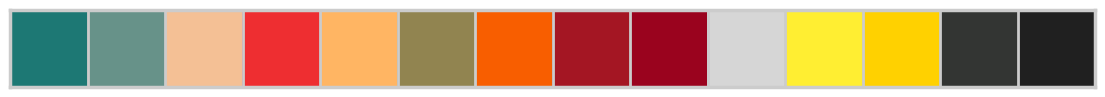

In [80]:
sns.set_style("whitegrid")
sns.set_context("poster",font_scale = .7)
pal = ["#5f0f40","#9a031e","#fb8b24","#e36414","#0f4c5c","#FFC300"]
palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]
palette_cmap = ["#679289","#ffd100","#1d7874","#f4c095","#ee2e31"]
sns.palplot(sns.color_palette(palette))
plt.show()

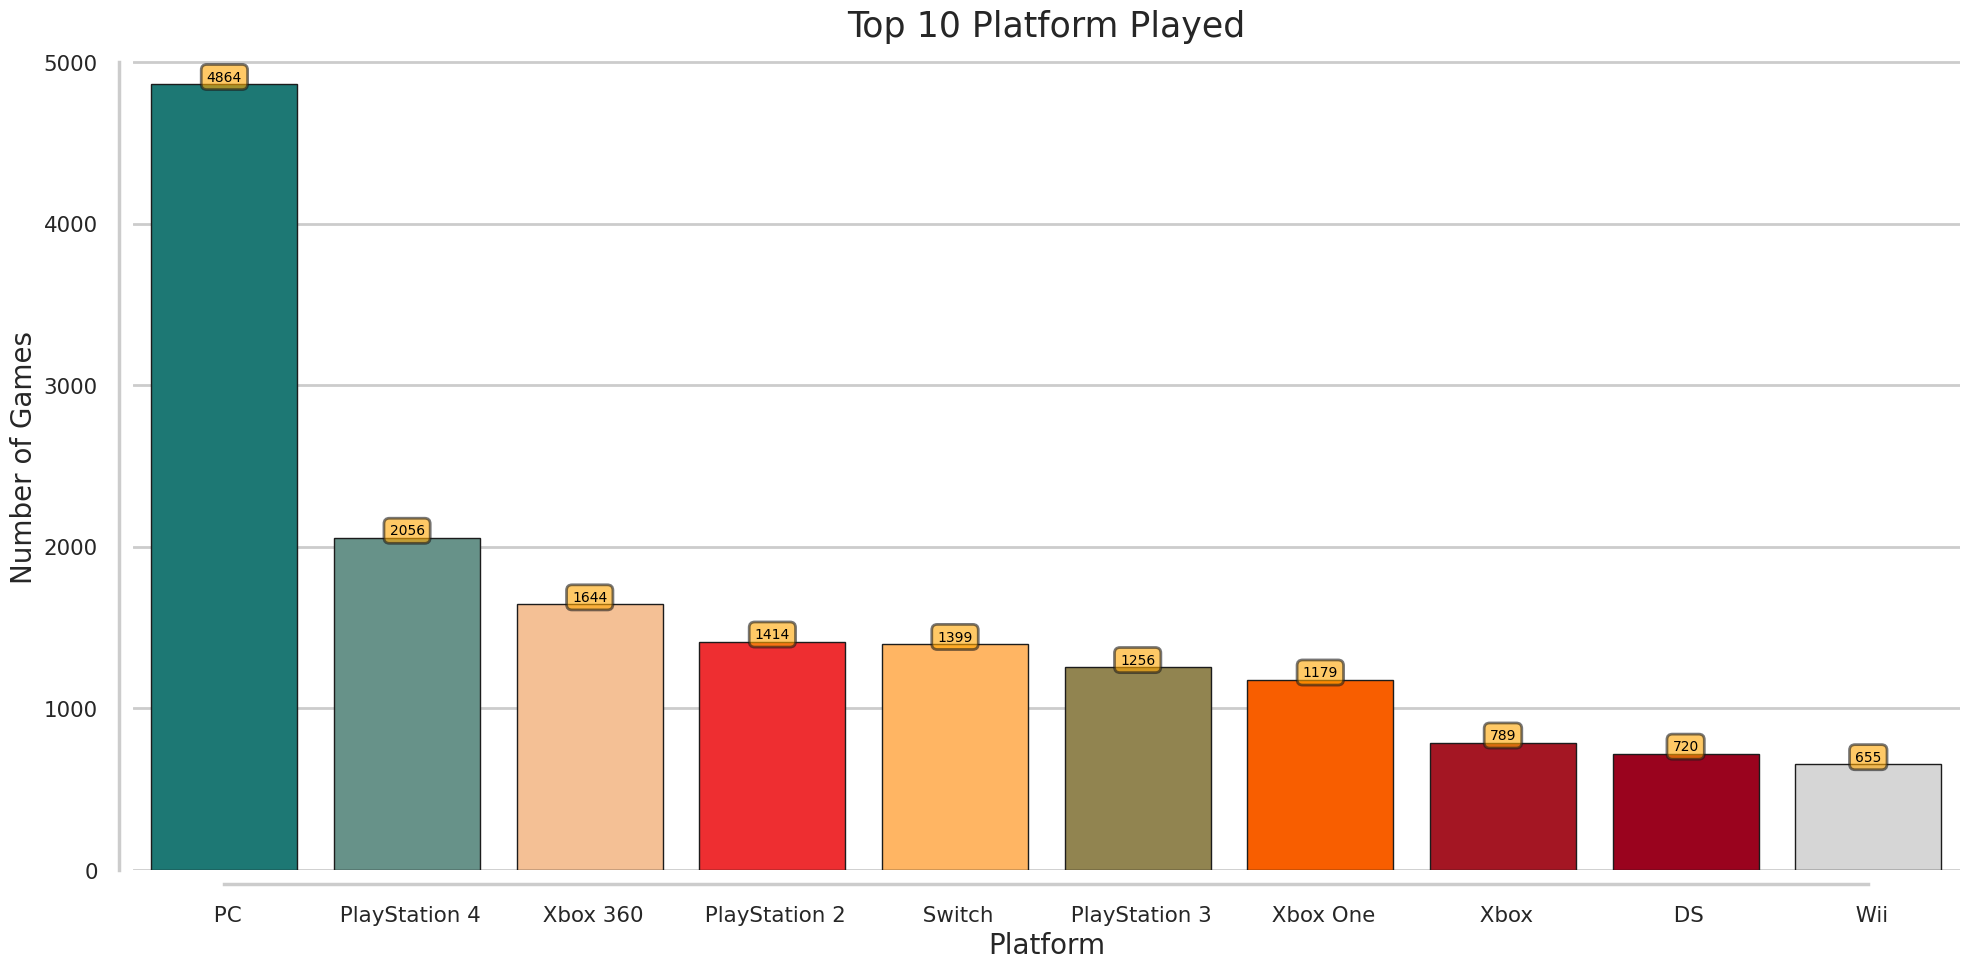

In [105]:
# Only select the top 10 platforms
plt.figure(figsize=(20, 10))
order = gm_df["platform"].value_counts().index[:10]
p = sns.countplot(
    x=gm_df["platform"],
    order=order,
    palette=palette[:10],  # Use the first 10 colors from the provided palette
    saturation=1,
    edgecolor="#1c1c1c",
    linewidth=1
)
p.set_xticklabels(p.get_xticklabels(), rotation=45, ha='right', fontsize=14)
p.set_yticklabels([f'{int(y)}' for y in p.get_yticks()], size=12)
p.set_title("Top 10 Platform Played", fontsize=25)
p.set_xlabel("Platform", fontsize=20)
p.set_ylabel("Number of Games", fontsize=20)
for container in p.containers:
    p.bar_label(container, fontsize=10, color='black', rotation=0,
                bbox=dict(boxstyle="round", pad=0.4, facecolor="orange", edgecolor="#1c1c1c", linewidth=2, alpha=0.6))
sns.despine(trim=True, offset=10)
plt.tight_layout()
plt.show()
